## The purpose of this script is to get average ERA5 conditions

In [2]:
import glob 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

### 2-meter Temperature 

In [168]:
def kelvin_to_f(K):
    f = (K - 273.15) * (9/5) + 32
    return f

In [169]:
files_temp = glob.glob('/pscratch/sd/s/smheflin/pnw_mcs/monthly/*/e5.oper.an.sfc.128_167_2t.*')
ds_temp = xr.open_mfdataset(files_temp) 

In [170]:
ds_temp

<xarray.Dataset> Size: 31GB
Dimensions:    (time: 7440, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 60kB 2014-08-01 ... 2023-08-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 31GB dask.array<chunksize=(27, 139, 277), meta=np.ndarray>
    utc_date   (time) int32 30kB dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r9i3n27 4.12.14-94.41-default #1 SMP Wed Oct ...
    CONVERSION_DATE:      Fri Aug 30 15:56:17 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Aug 30 15:56:48 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [185]:
august_mean = kelvin_to_f(ds_temp.groupby('time.date').mean().mean('date').VAR_2T).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

In [188]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_167_2t.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data =  kelvin_to_f(ds.VAR_2T.groupby('time.day').mean().sel(day = 17)).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

In [24]:
lon = ds_temp.longitude.sel(longitude = slice(360-130, 360-110))
lat = ds_temp.latitude.sel(latitude = slice(55,35))

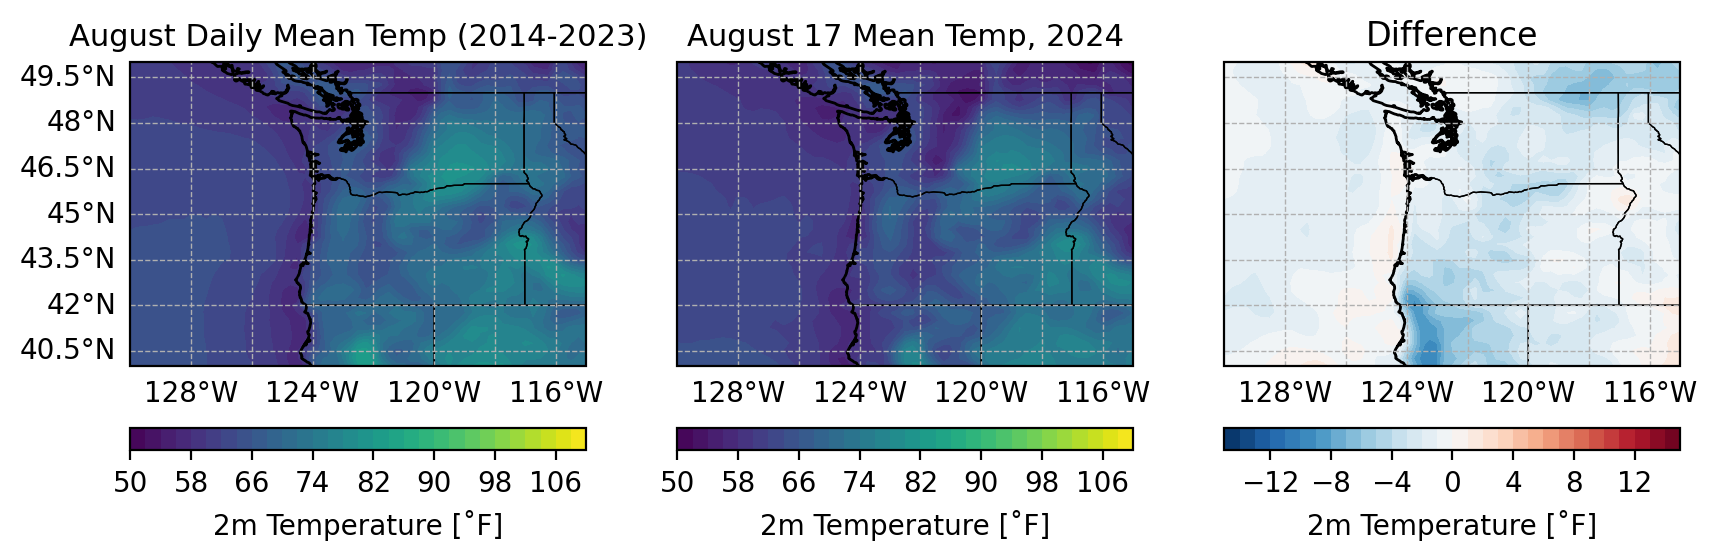

In [191]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-15,15,31)
levels = np.linspace(50,110,31) 


ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August Daily Mean Temp (2014-2023)', fontsize = 11)

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 17 Mean Temp, 2024', fontsize = 11)

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data - august_mean, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/temp_mean.png')


#### Maximum Temperature 

In [ ]:
august_mean = kelvin_to_f(ds_temp.groupby('time.date').max().mean('date').VAR_2T).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

Text(0.5, 1.0, 'Average August Daily Max Temperature, 2014-2023')

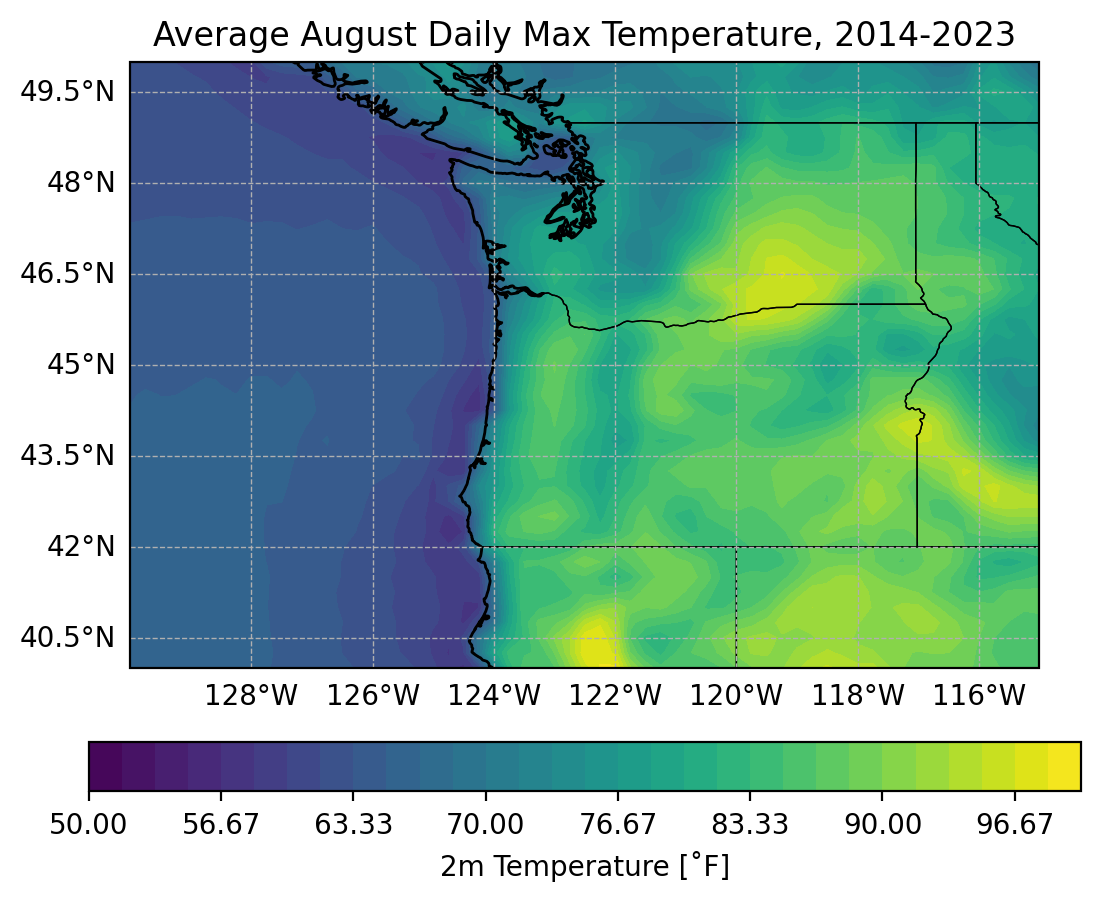

In [27]:
fig = plt.figure(dpi = 200)
levels = np.linspace(50,110,36) 

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
#ax.set_title(str(day_avg.time.data)[:19])
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_max, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
plt.title('Average August Daily Max Temperature, 2014-2023')


In [173]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_167_2t.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data =  kelvin_to_f(ds.VAR_2T.groupby('time.day').max().sel(day = 18)).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

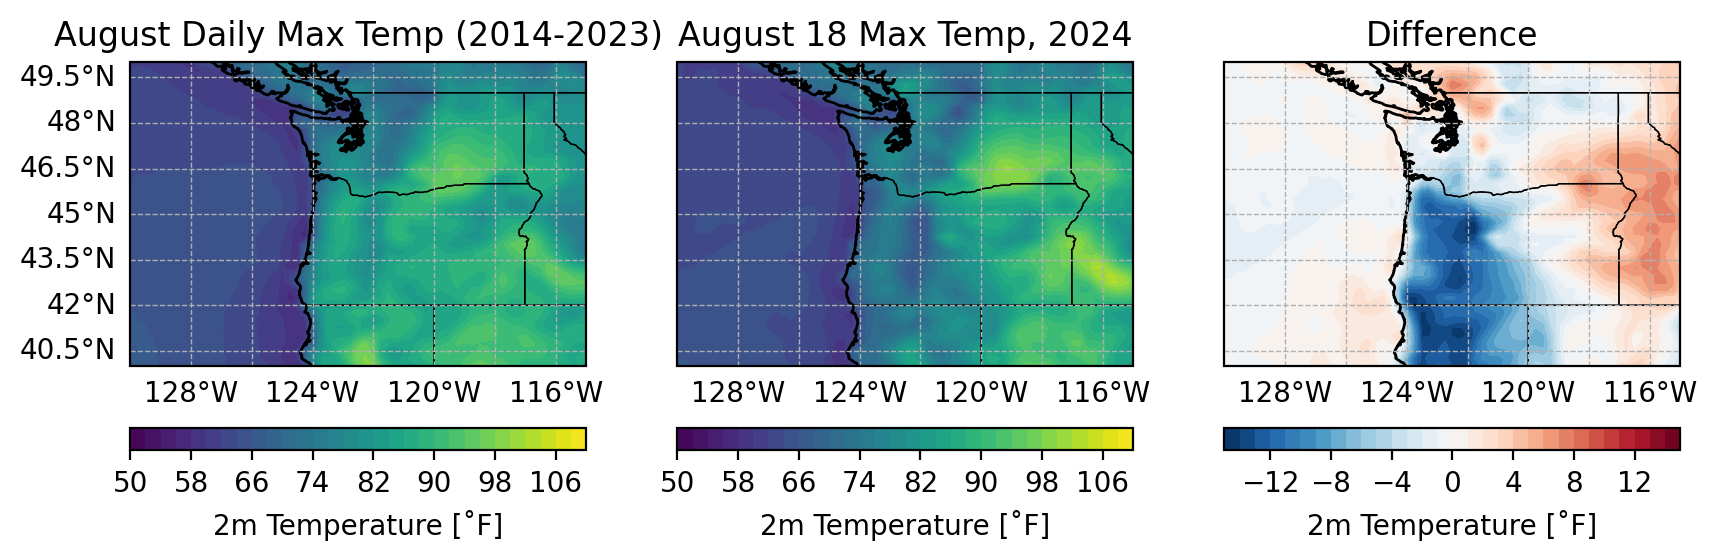

In [174]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-15,15,31)
levels = np.linspace(50,110,31) 


ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_max, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August Daily Max Temp (2014-2023)')

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 18 Max Temp, 2024')

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data - august_max, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/temp_max.png')


In [180]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_167_2t.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data =  kelvin_to_f(ds.VAR_2T.groupby('time.day').max().sel(day = 17)).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

<xarray.DataArray 'VAR_2T' (latitude: 81, longitude: 81)> Size: 26kB
array([[73.601   , 72.58849 , 71.31232 , ..., 71.85406 , 71.77672 ,
        71.56929 ],
       [72.6131  , 71.40021 , 69.786545, ..., 71.3232  , 70.49219 ,
        71.20235 ],
       [74.39552 , 73.1756  , 71.37912 , ..., 71.752106, 71.74859 ,
        72.423584],
       ...,
       [70.37744 , 70.18194 , 70.00264 , ..., 92.624374, 92.81416 ,
        93.081345],
       [70.40556 , 70.11865 , 69.816315, ..., 93.44702 , 93.600395,
        95.49883 ],
       [70.392876, 70.037796, 69.69348 , ..., 95.658295, 96.11533 ,
        96.7504  ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 648B 55.0 54.75 54.5 54.25 ... 35.5 35.25 35.0
  * longitude  (longitude) float64 648B 230.0 230.2 230.5 ... 249.5 249.8 250.0
    day        int64 8B 17

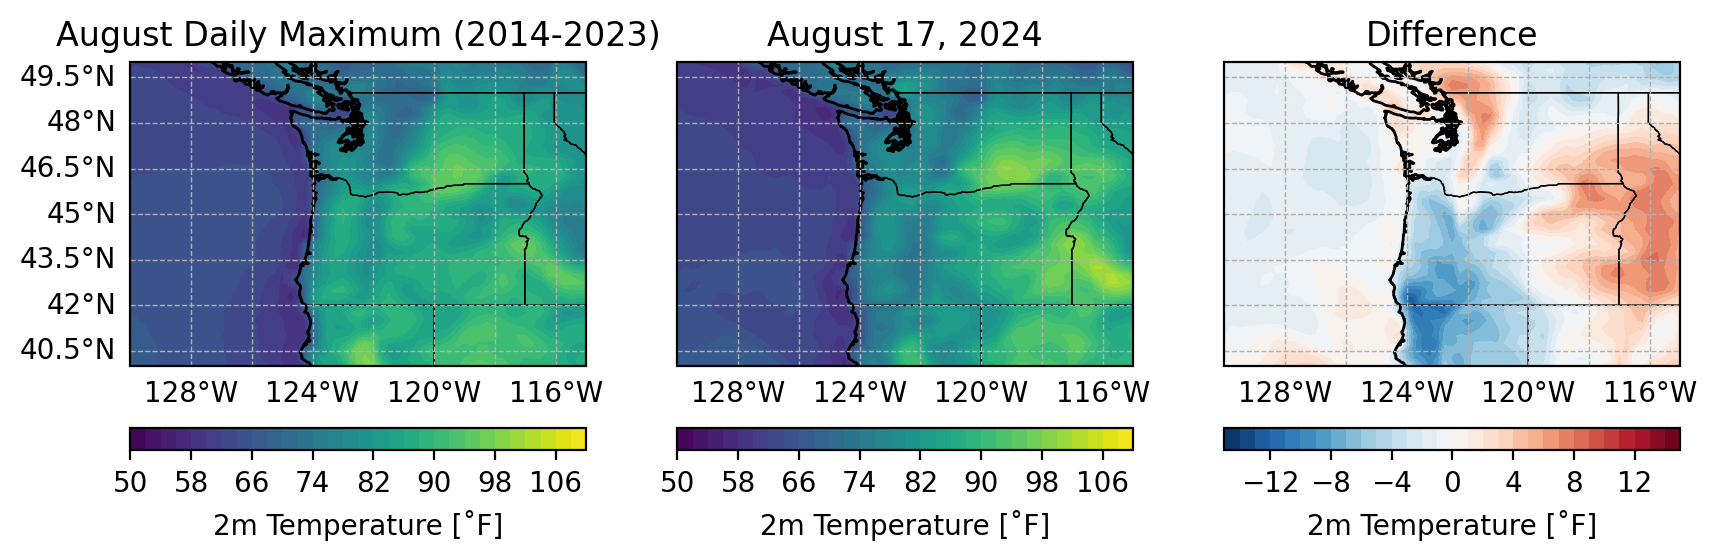

In [184]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-15,15,31)
levels = np.linspace(50,110,31) 


ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_max, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August Daily Maximum (2014-2023)')

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 17, 2024')

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data - august_max, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/temp_max_17.png')


### Monthly Temperature

In [164]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_167_2t.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data_month =  kelvin_to_f(ds.VAR_2T.mean('time').sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))).load()

In [167]:
august_avg = kelvin_to_f(ds_temp.groupby('time.year').mean().mean('year').VAR_2T.sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))).load()

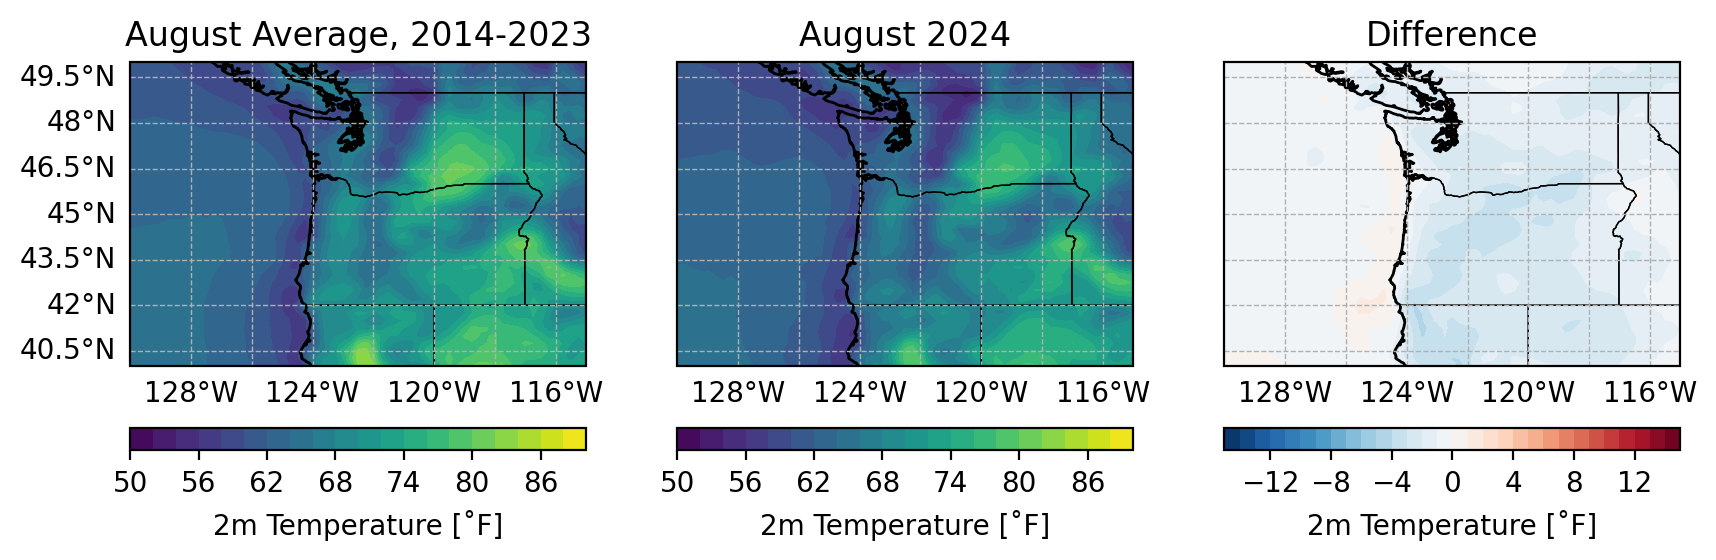

In [166]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-15,15,31)
levels = np.linspace(50,90,21) 

ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_avg, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August Average, 2014-2023')

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_month, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 2024')

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_month - august_avg, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Temperature [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/temp_month.png')


## Dewpoint

In [153]:
files_dew = glob.glob('/pscratch/sd/s/smheflin/pnw_mcs/monthly/*/e5.oper.an.sfc.128_168_2d.*')
ds_dew = xr.open_mfdataset(files_dew) 
august_mean_2d = kelvin_to_f(ds_dew.groupby('time.date').mean().mean('date').VAR_2D).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))


In [154]:
ds_dew

<xarray.Dataset> Size: 31GB
Dimensions:    (time: 7440, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 60kB 2014-08-01 ... 2023-08-31T23:00:00
Data variables:
    VAR_2D     (time, latitude, longitude) float32 31GB dask.array<chunksize=(27, 139, 277), meta=np.ndarray>
    utc_date   (time) int32 30kB dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r9i3n27 4.12.14-94.41-default #1 SMP Wed Oct ...
    CONVERSION_DATE:      Fri Aug 30 15:59:28 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Aug 30 15:59:46 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

Text(0.5, 1.0, 'Average August Daily Dewpoint, 2014-2023')

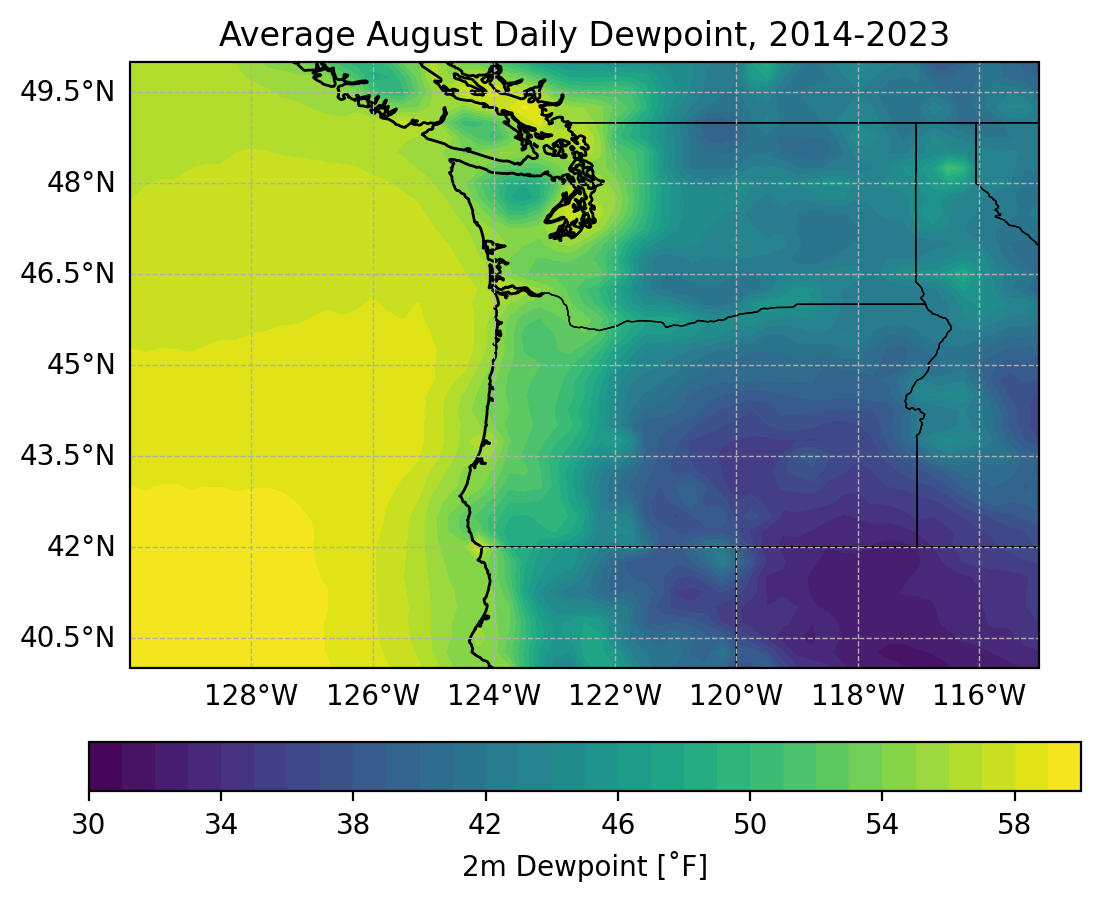

In [156]:
fig = plt.figure(dpi = 200)
levels = np.linspace(30,60,31) 
lon = ds_temp.longitude.sel(longitude = slice(360-130, 360-110))
lat = ds_temp.latitude.sel(latitude = slice(55,35))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
#ax.set_title(str(day_avg.time.data)[:19])
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean_2d, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Dewpoint [˚F]', orientation = 'horizontal', extend='both')
plt.title('Average August Daily Dewpoint, 2014-2023')

In [157]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_168_2d.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data =  kelvin_to_f(ds.VAR_2D.groupby('time.day').max().sel(day = 17)).sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

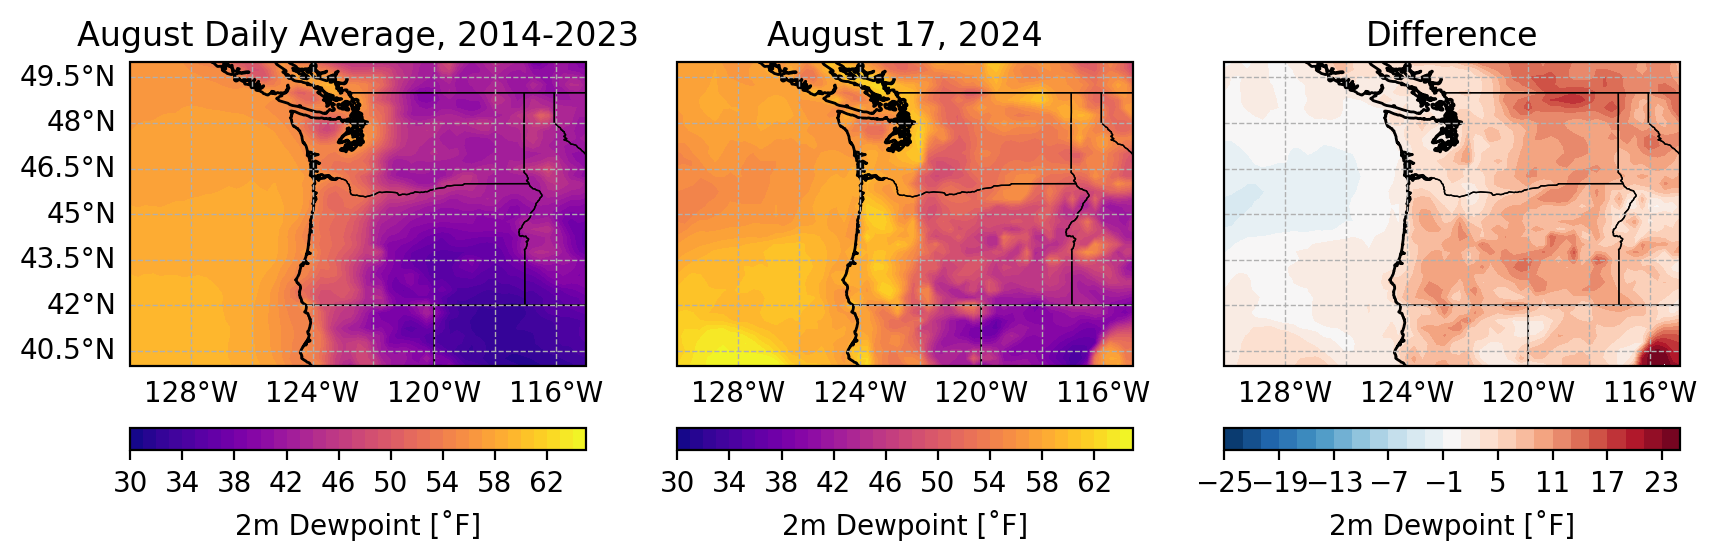

In [158]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-25,25,26)
levels = np.linspace(30,65,36) 

ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean_2d, levels = levels, cmap = 'plasma')
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Dewpoint [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August Daily Average, 2014-2023')

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data, levels = levels,  cmap = 'plasma')
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Dewpoint [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 17, 2024')

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data - august_mean_2d, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'2m Dewpoint [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/dew_avg.png')


### SST 

In [148]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_034_sstk.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data_daily =  kelvin_to_f(ds.SSTK.groupby('time.day').mean().mean('day').sel(latitude = slice(70,20), longitude =slice(360-150, 360-110)))

In [149]:
lon = ds.longitude.sel(longitude =slice(360-150, 360-110))
lat = ds.latitude.sel(latitude = slice(70,20))

Text(0.5, 1.0, 'Average August Daily SST, 2014-2023')

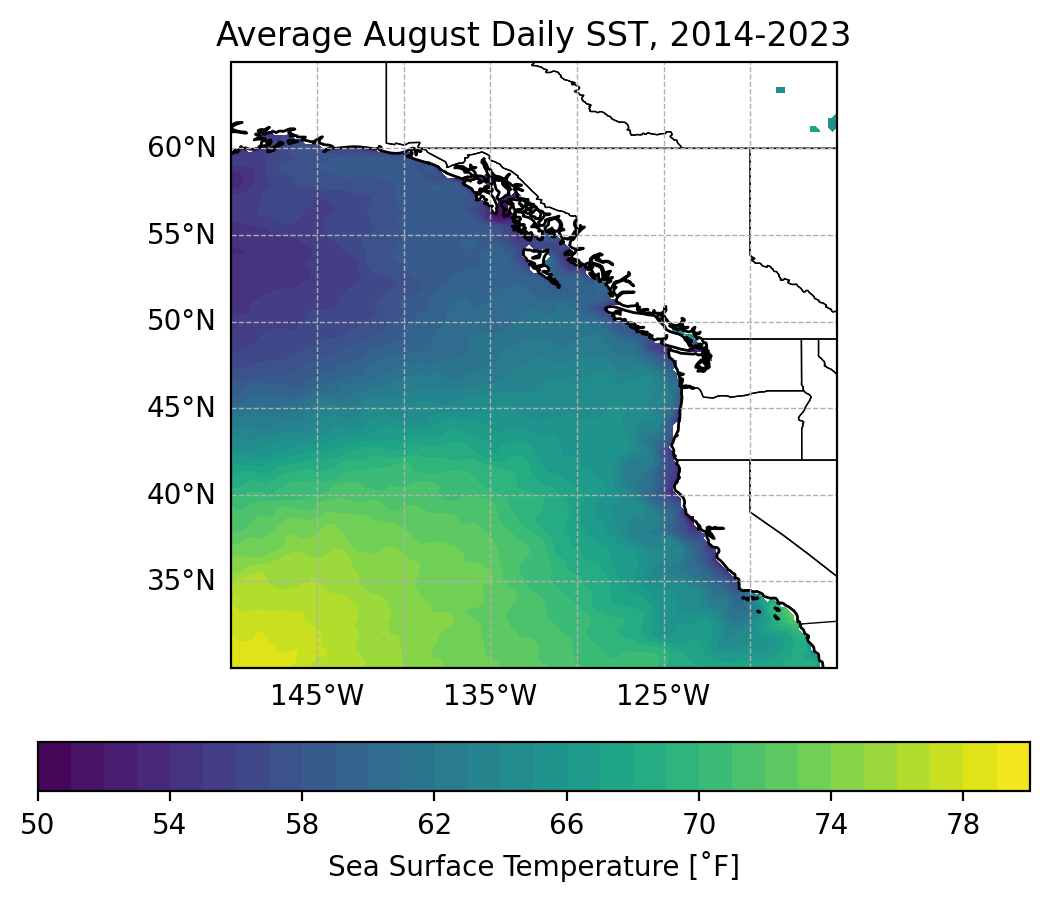

In [150]:
fig = plt.figure(dpi = 200)
levels = np.linspace(50,80,31) 

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-150, -115,30, 65], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
#ax.set_title(str(day_avg.time.data)[:19])
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_daily, levels = levels)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'Sea Surface Temperature [˚F]', orientation = 'horizontal', extend='both')
plt.title('Average August Daily SST, 2014-2023')

In [151]:
files_sst = glob.glob('/pscratch/sd/s/smheflin/pnw_mcs/monthly/*/e5.oper.an.sfc.128_034_sstk.*')
ds_sst = xr.open_mfdataset(files_sst) 
august_mean_sst = kelvin_to_f(ds_sst.groupby('time.date').mean().mean('date').SSTK.sel(latitude = slice(70,20), longitude =slice(360-150, 360-110)))


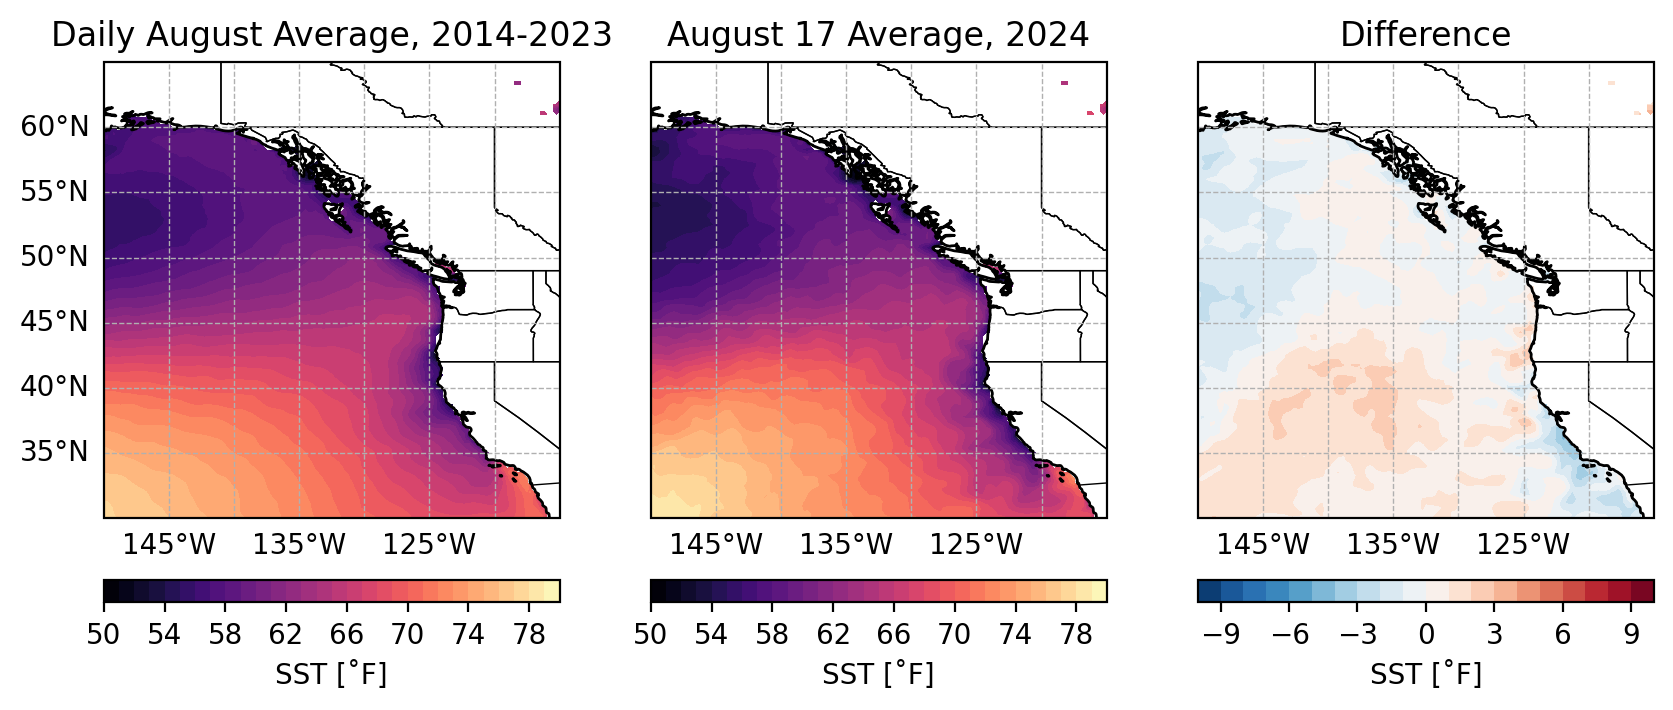

In [152]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.linspace(-10,10,21)
levels = np.linspace(50,80,31) 

ax = axes[0]
ax.set_extent([-150, -115,30, 65], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean_sst, levels = levels, cmap = 'magma')
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'SST [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Daily August Average, 2014-2023')

ax = axes[1]
ax.set_extent([-150, -115,30, 65], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_daily, levels = levels,  cmap = 'magma')
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'SST [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('August 17 Average, 2024')

ax = axes[2]
ax.set_extent([-150, -115,30, 65], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_daily - august_mean_sst, cmap = 'RdBu_r', levels = levels_diff)
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'SST [˚F]', orientation = 'horizontal', extend='both')
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/era5_climatology/sst_avg.png')


### CAPE

In [135]:
files_cape = glob.glob('/pscratch/sd/s/smheflin/pnw_mcs/monthly/*/e5.oper.an.sfc.128_059_cape.*')
ds_cape = xr.open_mfdataset(files_cape) 
august_mean_cape = ds_cape.groupby('time.date').max().mean('date').CAPE.sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))
lon = ds_temp.longitude.sel(longitude = slice(360-130, 360-110))
lat = ds_temp.latitude.sel(latitude = slice(55,35))

Text(0.5, 1.0, 'Average August Daily CAPE, 2014-2023')

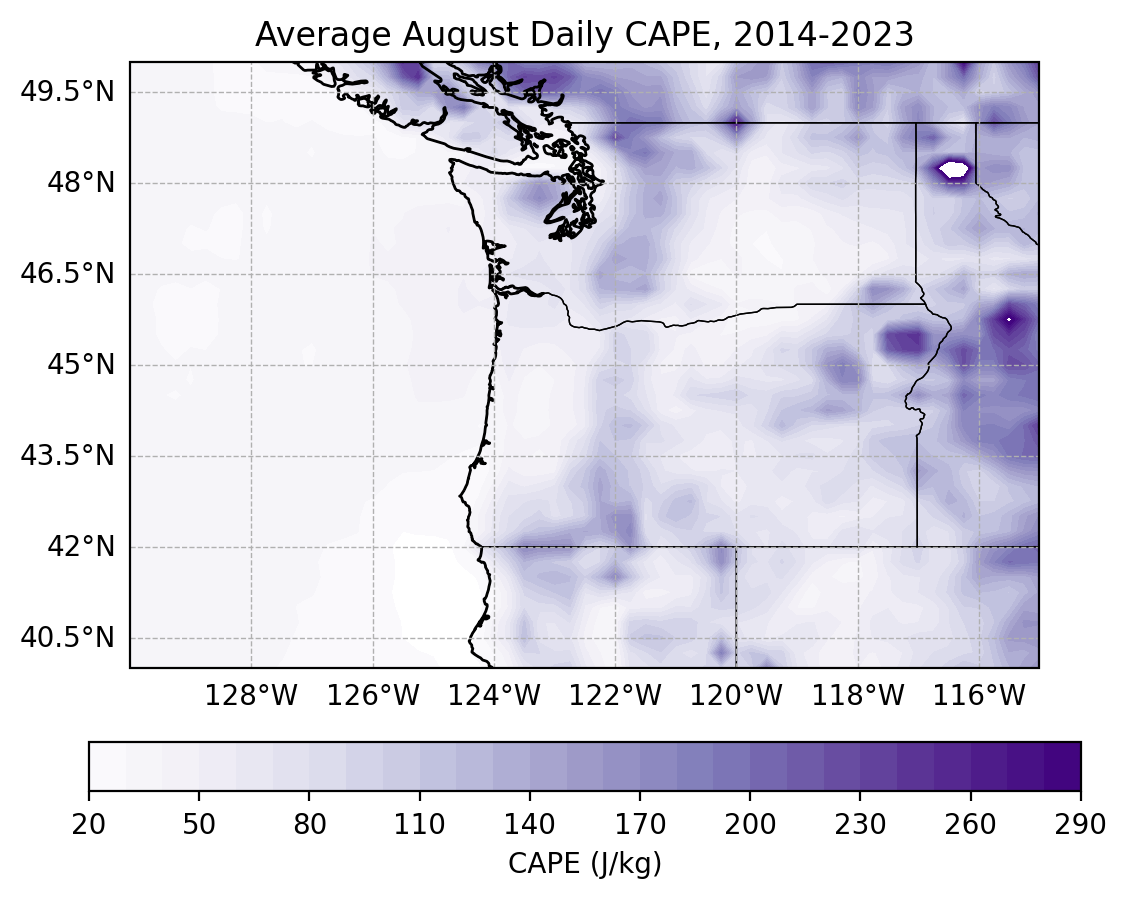

In [136]:
fig = plt.figure(dpi = 200)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
#ax.set_title(str(day_avg.time.data)[:19])
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean_cape, levels = levels, cmap = 'Purples')
plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'CAPE (J/kg)', orientation = 'horizontal', extend='both')
plt.title('Average August Daily CAPE, 2014-2023')

In [137]:
f = '/pscratch/sd/s/smheflin/pnw_mcs/e5.oper.an.sfc.128_059_cape.ll025sc.2024080100_2024083123.nc'
ds = xr.open_dataset(f)
data_daily =  ds.CAPE.groupby('time.day').max().mean('day').sel(latitude = slice(55,35), longitude =slice(360-130, 360-110))

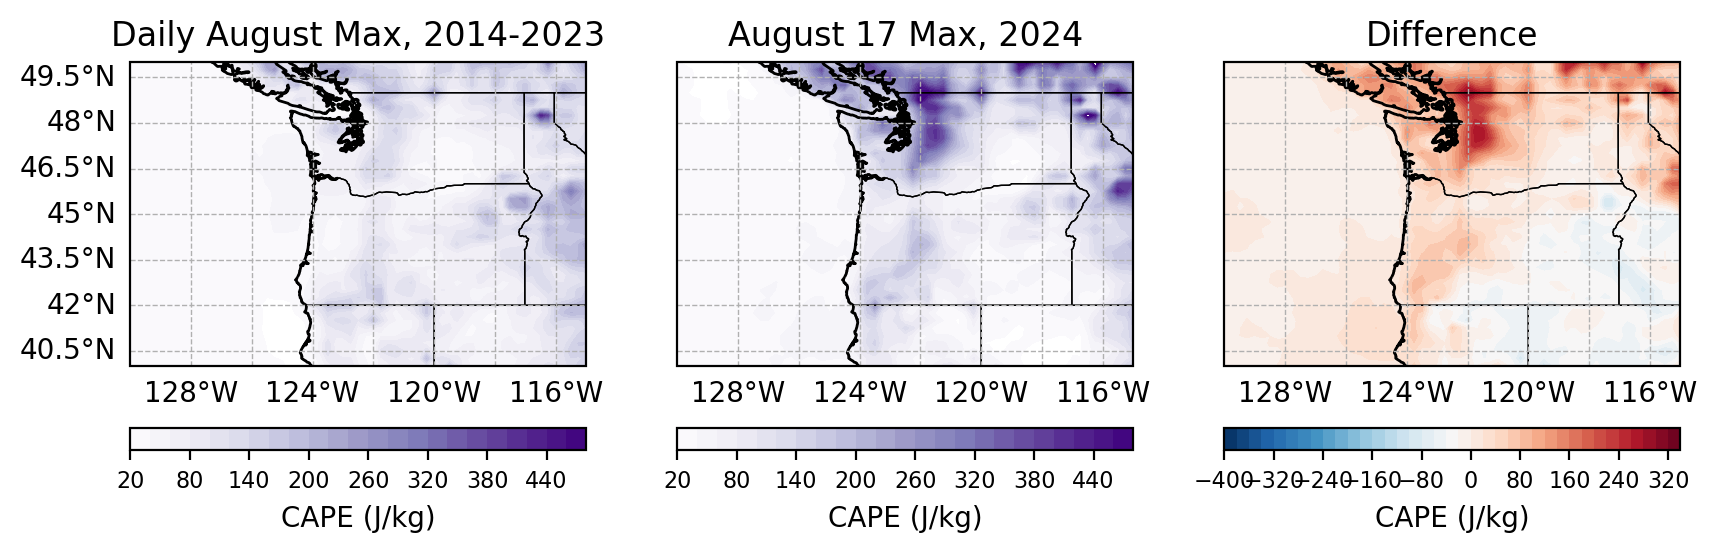

In [147]:
fig, axes = plt.subplots(1,3,figsize = (10,4),dpi = 200,subplot_kw={'projection': ccrs.PlateCarree()})
levels_diff = np.arange(-400,350,20)
levels = np.arange(20,500,20) 

ax = axes[0]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, august_mean_cape, levels = levels, cmap = 'Purples')
cbar = plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'CAPE (J/kg)', orientation = 'horizontal', extend='both')
cbar.ax.tick_params(labelsize=8) 

ax.set_title('Daily August Max, 2014-2023')

ax = axes[1]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.left_labels = False
gl.top_labels = False
ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_daily, levels = levels,  cmap = 'Purples')
cbar = plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'CAPE (J/kg)', orientation = 'horizontal', extend='both')
cbar.ax.tick_params(labelsize=8) 

ax.set_title('August 17 Max, 2024')

ax = axes[2]
ax.set_extent([-130, -115,40, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
proj = ccrs.PlateCarree()
gl = ax.gridlines(crs=proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = False

ax.add_feature(cfeature.STATES, edgecolor='k', linewidth=0.5)
a = ax.contourf(lon, lat, data_daily - august_mean_cape, cmap = 'RdBu_r', levels = levels_diff)
cbar = plt.colorbar(a, ax = ax,fraction = 0.08, pad = 0.1, label = r'CAPE (J/kg)', orientation = 'horizontal', extend='both')
cbar.ax.tick_params(labelsize=8) 
ax.set_title('Difference')
plt.savefig('/global/homes/s/smheflin/august18-mcs/CAPE_max.png')
